# __ASE introduction__
The aim of this notebook is to provide a solid introduction to ASE, as a standalone programme and as an interface to several NNPs such as ANI, MACE, Orbital, SchNet. 

### __References__
ASE includes extensive [documentation](https://wiki.fysik.dtu.dk/ase/) where installatin procedure and tutorials can be found. 

Introductory tutorials can be found [here (getting started)](https://wiki.fysik.dtu.dk/ase/gettingstarted/gettingstarted.html), with a follow-up set of tutorials [here (tutorials)](https://wiki.fysik.dtu.dk/ase/tutorials/tutorials.html). 

- Additional ASE tutorials used in this introduction:
    - Complete ASE introduction [tutorial](https://docs.matlantis.com/atomistic-simulation-tutorial/en/index.html). 
    - Official ASE MD [tutorials](https://wiki.fysik.dtu.dk/ase/tutorials/md/md.html). 

- MD tutorials.
    - Short introduction with MACE FF. [link](https://rwexler.github.io/comp-prob-solv/lecture-23-ase.html). 
    - Official MD [documentation](https://wiki.fysik.dtu.dk/ase/ase/md.html). 
    - Extra MD [tutorial](https://docs.matlantis.com/atomistic-simulation-tutorial/en/1_5_ase_calculator.html). 


### __ASE Installation__
To start, as goes for many different software, but particularly for ASE and external calculators, separate conda environments are recommended. The installation is as follows:
- Installation process
    - Create new conda environment (python 3.10 is standard). Check the Python requirement for the external calculator wanted. Usually  `python>3.9`.  
    - `conda install ase` (installs `scipy` and `numpy` dependencies) and `conda install matplotlib`. 
    - Check the environment works installing `conda install pytest` and `ase test`.
    - For ASE representations inside Jupyter Notebook, conda install `notebook`, `ipywidgets` and `nglview`. 

Detailed installation guide [here](https://wiki.fysik.dtu.dk/ase/install.html#download-and-install). 

**Installation of ASAP3-EMP calculator.** Install `openmpi` and `libxc`. Then do `pip install asap3`. Note that the conda installation via `conda-forge` does not work idk why... Read [the docs](https://asap3.readthedocs.io/en/latest/installation/Installing_ASE_Asap_and_GPAW_on_a_Mac.html#installing-ase-asap-and-gpaw-on-a-mac). 


**Installation of GPAW DFT calculator.** Install `openmpi` and `libxc`. Then do `pip install asap3`. Finally, `pip install gpaw`. 

# __1. Initial tutorials__
### __1.1 Tutorial_1__

In [1]:
from ase import Atoms
from ase.build import add_adsorbate, fcc111
from ase.calculators.emt import EMT
from ase.constraints import FixAtoms
from ase.optimize import QuasiNewton

h = 1.85
d = 1.10

slab = fcc111('Cu', size=(4, 4, 2), vacuum=10.0)

slab.calc = EMT()
e_slab = slab.get_potential_energy()

molecule = Atoms('2N', positions=[(0., 0., 0.), (0., 0., d)])
molecule.calc = EMT()
e_N2 = molecule.get_potential_energy()

add_adsorbate(slab, molecule, h, 'ontop')
constraint = FixAtoms(mask=[a.symbol != 'N' for a in slab])
slab.set_constraint(constraint)
dyn = QuasiNewton(slab, trajectory='N2Cu.traj')
dyn.run(fmax=0.05)

print('Adsorption energy:', e_slab + e_N2 - slab.get_potential_energy())

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 17:23:03       11.689927       1.0797
BFGSLineSearch:    1[  2] 17:23:03       11.670814       0.4090
BFGSLineSearch:    2[  4] 17:23:03       11.625880       0.0409
Adsorption energy: 0.32351942231763964


Note that when saving or reading files, only one configuration is saved.

In [2]:
# output to an external file format (not .traj ASE format)
from ase.io import write
write('slab.xyz', slab)

/Users/sergiortizropero/miniconda3/envs/ASE_base/lib/python3.10/site-packages/ase/io/extxyz.py:311: UserWarning: Skipping unhashable information adsorbate_info
  warnings.warn('Skipping unhashable information '


In [3]:
# read from the file
from ase.io import read
slab_from_file = read('slab.xyz')

print(slab_from_file)

# read a specific configuration from the .traj file (default the last one)
sth = read('N2Cu.traj', -1)
print(sth)

Atoms(symbols='Cu32N2', pbc=[True, True, False], cell=[[10.210621920333747, 0.0, 0.0], [5.105310960166873, 8.842657971447272, 0.0], [0.0, 0.0, 22.08423447177455]], tags=..., calculator=SinglePointCalculator(...))
Atoms(symbols='Cu32N2', pbc=[True, True, False], cell=[[10.210621920333747, 0.0, 0.0], [5.105310960166873, 8.842657971447272, 0.0], [0.0, 0.0, 22.08423447177455]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), calculator=SinglePointCalculator(...))


Viewing options https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html. 

In [4]:
# GUI visualization of the ASE objects
from ase.visualize import view


# basic jupyter visualization
#view(slab, viewer='x3d')

# basic (but more advanced) visualization
view(slab, viewer='ngl')

# check if the representation can be changed. 

In [5]:
view(sth, viewer='ngl')

In [6]:
# customization of the view (broken)
v = view(slab, viewer='ngl')

# nglviewer options
v.custom_colors({'N':'green','Cu':'blue'})
v.view._remote_call("setSize", target="Widget", args=["600px", "400px"])
v.view.center()
v.view.background='#ffc'
v.view.parameters=dict(clipDist=-200)
v

Md simulation

In [7]:
from ase.md.verlet import VelocityVerlet
from ase import units
dyn = VelocityVerlet(molecule, timestep=1.0 * units.fs)
for i in range(10):
    pot = molecule.get_potential_energy()
    kin = molecule.get_kinetic_energy()
    print('%2d: %.5f eV, %.5f eV, %.5f eV' % (i, pot + kin, pot, kin))
    dyn.run(steps=20)

 0: 0.44034 eV, 0.44034 eV, 0.00000 eV
 1: 0.43816 eV, 0.26289 eV, 0.17527 eV
 2: 0.44058 eV, 0.43142 eV, 0.00916 eV
 3: 0.43874 eV, 0.29292 eV, 0.14582 eV
 4: 0.44015 eV, 0.41839 eV, 0.02176 eV
 5: 0.43831 eV, 0.28902 eV, 0.14929 eV
 6: 0.43947 eV, 0.36902 eV, 0.07045 eV
 7: 0.43951 eV, 0.35507 eV, 0.08444 eV
 8: 0.43959 eV, 0.36221 eV, 0.07738 eV
 9: 0.43933 eV, 0.36044 eV, 0.07889 eV


### __1.2 Tutorial_2__
DFT calculation of 

In [8]:
from ase import Atoms
atoms = Atoms('N2', positions=[[0, 0, -1], [1, 0, 1]])


# save the view
from ase.io import write
write('myatoms.traj', atoms)



In [9]:
# inspect it (rotate holding right click)
# ! ase gui myatoms.traj

General procedure to use a calculator 

In [10]:
# import the packages corresponding to the calculator used




# define the calculator
calc = CALCULATOR(CALCULATOR-SPECIFIC-ARGUMENTS)

# apply it to the system
atoms.calc = calc

# compute properties (multiple methods available)
e_atoms = atoms.get_potential_energies()
f_atoms = atoms.get_forces() 

NameError: name 'CALCULATOR' is not defined

ASE can perform point-wise calculations given a set of geometries. We can save this as a trajectory. 

In [ ]:
from ase.io.trajectory import Trajectory


# use iread to read the trajectory. 


## __1.3 Tutorial 3. Usage of external calculators.__
To use external calculators, the external package (that contains the calculator) must be located and defined with an environment variable. External calculators interface with ASE in the following way: ASE handles writing the input files, which are required for the run, and then executes the `EXTERNAL_PROGRAM_EXECUTABLE` (previously defined enviornment variable), i.e. executes the external software (e.g. ORCA). Once the ORCA run is complete, ASE then reads all of the relevant files, and stores properties in the calculator object.

**Calculator env var definition.** `<PROGRAM>` wasn’t listed as available. We first need to tell ASE how to run it (configuration step for many ASE calculators) defining the corresponding environment variables. Example given:

**Example: AIMS** Different calculators communicate with computational codes in different ways. GPAW is written in Python, so ASE and GPAW run within the same process. However FHI-aims is a separate program. What the Aims calculator does for us is to generate an input file, run FHI-aims, read the output, and return the results. 

Many ASE calculators support more advanced ways of communicating. These calculators can communicate with persistent external processes over pipes (Lammpsrun, CP2K) or sockets (Siesta, Aims, Espresso), or they can work within the same process through direct library calls (Lammpslib, GPAW).

ASE can communicate with FHI-aims over sockets using the i-PI protocol (http://ipi-code.org/). This is done by wrapping the calculator in a ase.calculators.socketio.SocketIOCalculator. The socket calculator will use the calculator it wraps to launch a calculation, then run it.

Note. The documentation on the socket I/O calculator already provides full examples, so we only need minor adjustments to run them on our local machine. 

Check the last section of this [tutorial](https://wiki.fysik.dtu.dk/ase/gettingstarted/tut02_h2o_structure/h2o.html) for more info. 

In [32]:
$ export ASE_AIMS_COMMAND=aims.x
$ export AIMS_SPECIES_DIR=/home/alumne/software/FHIaims/species_defaults/light

SyntaxError: invalid syntax (2298468680.py, line 1)

Once the environment variables are defined, ASE should 'see' them. Run `ase info --calculators` to check it is properly configured. Example, if we want to check if GROMACS calculator is defined, use `ase info --calculators | grep gaussian`. 

**Note.** Note that this setup will be restarted once the shell (conda environment) is restarted. We can define these env variables in the `.bash_profile` (macOS) or call them inside the ASE script directly. 

**Example continuation.** 

In [9]:
import os

from ase import Atoms
from ase.calculators.aims import Aims
from ase.calculators.socketio import SocketIOCalculator
from ase.optimize import BFGS

os.environ['ASE_AIMS_COMMAND'] = 'aims.x'
os.environ['AIMS_SPECIES_DIR'] = '/home/myname/FHIaims/species_defaults/light'

atoms = Atoms('HOH',
              positions=[[0, 0, -1], [0, 1, 0], [0, 0, 1]])
opt = BFGS(atoms, trajectory='opt-aims-socketio.traj')

aims = Aims(xc='LDA',
            compute_forces=True,
            use_pimd_wrapper=('UNIX:mysocket', 31415))

with SocketIOCalculator(aims, unixsocket='mysocket') as calc:
    atoms.calc = calc
    opt.run(fmax=0.05)

BadConfiguration: No configuration of 'aims'. See 'https://wiki.fysik.dtu.dk/ase/ase/calculators/calculators.html#calculator-configuration'

# __2. ASE MD Tutorials__
### __Atoms and manipulation__
A general introduction to ASE is provided covering the `atoms`, `calculators` and `optimizers` and how to apply it to MD. This is just an overview. 

- `Atoms` is a class containing the view (atomic positions, structure of a system). It contains the element type, coordinates, velocities, PBC bool and cell info. Methods include get_masses, len_atoms, get_momenta, etc. if applicable. 
- **Units.** ASE uses eV for energy, Å for length and e for charge. 
- **Molecular databases.** A number of molecules are predefined in ASE. E.g. `ase.collections g2` contains 'usual' molecules

**Tips.** Info about an ASE class can be retreived via `Atoms?` in an interactive ipy environment. 


In [10]:
from ase.build import molecule
from ase.collections import g2

print(f"Available molecule:", len(g2.names), g2.names)

Available molecule: 162 ['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF', 'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2', 'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3', 'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane', 'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2', 'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl', 'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN', 'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO', 'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2', 'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C', 'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S', 'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d', 'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O', 'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF', 'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4', 'SiO', 'C3H4_D2d', 'H', 'COF2', '

- `bulk` method is used to create crystal structures via specifying the values that characterize the crystal: name, crystalstructure, a, b, c, alpha, covera, cubic kwargs. Note that `bulk` method uses PBCs to define the crystal (the representation will show so). 
- To define the real cell (for example, multiple atoms in one direction), use the `repeat` method or by multiplication


In [11]:
from ase.build import bulk

fe_sc_atoms = bulk(name="Fe", crystalstructure="sc", a=2.0)
fe_sc_atoms

fe222_atoms = fe_sc_atoms.repeat((2, 3, 4))
#fe222_atoms = fe_sc_atoms * (2, 3, 4)

fe222_atoms

Atoms(symbols='Fe24', pbc=True, cell=[4.0, 6.0, 8.0])

[El tutorial continua però això em dona bastant igual.]

- `read` and `write` functions allow outputs and inputs of ASE objects. 
- External molecules can be importes in ASE through the smile or via an external molecular structural database. 

The structure can be modified via translation and rotation (and or combination of them) using `Atoms.translate([x, y, z])` to the `Atoms` view. Rotations can be specified using the normal plane via `Atoms.rotate(angle, v='z')`, additional option of `rotate_cell=True` should be used to rotate the PBC crystalline cell. 

In [12]:
from ase.visualize import view
atoms = bulk("Fe") * (2, 3, 4)

atoms.rotate(90, v=[0, 0, 1], rotate_cell=True)
view(atoms, viewer='ngl', )

Additional geometry moves include `rattle` (creates a messy structure by randomly moving each atom). Kwargs include `stdev` and `seed` for degree of movement and pseudorandom generator. 

In [13]:
import numpy as np
atoms = bulk("Si") * (2, 3, 4)
atoms2 = atoms.copy()

atoms.rattle(stdev=0.2, rng=np.random.RandomState())
atoms2.rattle(stdev=0.2, rng=np.random.RandomState())

print("atoms & atoms2 positions are same? --> ", np.allclose(atoms.positions, atoms2.positions))
view(atoms, viewer='ngl', )

atoms & atoms2 positions are same? -->  False


Additionally, if an atom has moved outside of the cell, it can be brought back to the cell (PBC) using `wrap`

In [14]:
atoms.wrap()
view(atoms, viewer='ngl', )

Additional `Atoms` transformation (regarding solid or periodic structures) can be found [here](https://docs.matlantis.com/atomistic-simulation-tutorial/en/1_7_ase_playground2.html). 

### __Calculator setup__
The atomic structure is represented by the `Atoms` class. Each physical property can be computed via a calculator applied to the structure/view (`Atoms` class). The calculator is 'added' by defining `Atoms.calc` attribute. The calculator contains previous calculation results and previous input. 

Once the calculator has been added, the physical properties can be extracted from the `Atoms` object calling e.g. `Atoms.get_potential_energy()`. Methods include `get_x_energy()`, `get_forces()`, `get_charges()`, `get_magnetic_moment`, `get_dipole_moment`, among others (specific to the calculator).  

The calculator class is in charge of calculating the associated physical properties. Note that these calculators might be based on QM, MM, or NNP methods. 

Note that the chache of the calculator can be reset using `calculator.reset()` on the `Atoms.calc` object. This is impractical for simulations that require several point-wise calculations. 

In [15]:
from ase.build import bulk
from ase.calculators.emt import EMT


calculator_emt = EMT()

atoms = bulk("Cu")
atoms.calc = calculator_emt

E_pot_emt = atoms.get_potential_energy()
print(f"Potential energy {E_pot_emt:.5f} eV")

Potential energy -0.00568 eV


## __2.1 Propedeutic examples__
These examples require a QM calculator to run. 

### __Dissociation of a diatomic molecule__

In [16]:
# diatomic dissociation potential:
# https://docs.matlantis.com/atomistic-simulation-tutorial/en/1_8_diatomic_potential.html
# TODO

### __Structural relaxation (optimization)__ 
Optimization procedure requires a structural view (`Atoms`), a calculator to perform single-point calculations (using the interatomic potential of the given calculator) and then specifying the optimization algorithm to use. Relevant optimization algorithms are provided in the [documentation](https://wiki.fysik.dtu.dk/ase/ase/optimize.html). 

In [17]:
# optimization of different systems. 
# TODO. use then a calculator is available. 
# https://docs.matlantis.com/atomistic-simulation-tutorial/en/2_1_opt.html

In [18]:
# additional optimization examples
# TODO. 
# https://docs.matlantis.com/atomistic-simulation-tutorial/en/2_2_opt_symmetry.html

In [19]:
# energy minimization examples
# TODO. 
# https://docs.matlantis.com/atomistic-simulation-tutorial/en/3_1_bulk_energy.html
# bulk energies (other available)

In [20]:
# NBO vibration analysis
# TODO
# https://docs.matlantis.com/atomistic-simulation-tutorial/en/4_1_vibration.html


In [21]:
# Curtis rearrangement simple electronic rearrangement rx. 
# TODO. 
# https://docs.matlantis.com/atomistic-simulation-tutorial/en/5_1_neb_basic.html


## __2.2 MD examples__

A first example is provided below, a melting process of Aluminium FCC. 

In [22]:
import os
from asap3 import EMT
calculator = EMT()

from ase.build import bulk
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution,Stationary
from ase.md.verlet import VelocityVerlet
from ase.md import MDLogger
from ase import units
from time import perf_counter
import numpy as np

# Set up a fcc-Al crystal
atoms = bulk("Al","fcc",a=4.3,cubic=True)
atoms.pbc = True
atoms *= 3
print("atoms = ",atoms)

# Set calculator (EMT in this case)
atoms.calc = calculator

# input parameters
time_step    = 1.0      # MD step size in fsec
temperature  = 1600     # Temperature in Kelvin
num_md_steps = 100000   # Total number of MD steps
num_interval = 1000     # Print out interval for .log and .traj

# Set the momenta corresponding to the given "temperature"
MaxwellBoltzmannDistribution(atoms, temperature_K=temperature,force_temp=True)
Stationary(atoms)  # Set zero total momentum to avoid drifting

# Set output filenames
output_filename = "./liquid-Al_NVE_1.0fs_test/"
if not os.path.isdir(output_filename):
    os.makedirs(output_filename)
log_filename = output_filename + "log_file.log"
print("log_filename = ",log_filename)
traj_filename = output_filename + "trajectory.traj"
print("traj_filename = ",traj_filename)

# Remove old files if they exist
if os.path.exists(os.path.join(log_filename, '.log')): 
    os.remove(log_filename)
if os.path.exists(os.path.join(traj_filename, '.traj')): 
    os.remove(traj_filename)

# Define the MD dynamics class object
dyn = VelocityVerlet(atoms,
                     time_step * units.fs,
                     trajectory = traj_filename,
                     loginterval=num_interval
                    )

# Print statements
def print_dyn():
    imd = dyn.get_number_of_steps()
    time_md = time_step*imd
    etot  = atoms.get_total_energy()
    ekin  = atoms.get_kinetic_energy()
    epot  = atoms.get_potential_energy()
    temp_K = atoms.get_temperature()
    print(f"   {imd: >3}     {etot:.9f}     {ekin:.9f}    {epot:.9f}   {temp_K:.2f}")

dyn.attach(print_dyn, interval=num_interval)

# Set MD logger
dyn.attach(MDLogger(dyn, atoms, log_filename, header=True, stress=False,peratom=False, mode="w"), interval=num_interval)

# Now run MD simulation
print(f"\n    imd     Etot(eV)    Ekin(eV)    Epot(eV)    T(K)")
dyn.run(num_md_steps)


print("\nNormal termination of the MD run!")

[Sergis-MacBook-Pro.local:65664] shmem: mmap: an error occurred while determining whether or not /var/folders/cq/s30xmbh57xndgmhg1zhwclsh0000gn/T//ompi.Sergis-MacBook-Pro.501/jf.0/3451125760/sm_segment.Sergis-MacBook-Pro.501.cdb40000.0 could be created.


atoms =  Atoms(symbols='Al108', pbc=True, cell=[12.899999999999999, 12.899999999999999, 12.899999999999999])
log_filename =  ./liquid-Al_NVE_1.0fs_test/log_file.log
traj_filename =  ./liquid-Al_NVE_1.0fs_test/trajectory.traj

    imd     Etot(eV)    Ekin(eV)    Epot(eV)    T(K)
     0     32.139701294     22.336120234    9.803581060   1600.00
   1000     32.144573345     10.147479616    21.997093729   726.89
   2000     32.144669489     9.872400817    22.272268672   707.19
   3000     32.144653714     9.955368258    22.189285455   713.13
   4000     32.144150322     10.895194704    21.248955619   780.45
   5000     32.144105640     10.605084474    21.539021166   759.67
   6000     32.144333386     10.984207379    21.160126007   786.83
   7000     32.144442783     9.745698610    22.398744173   698.11
   8000     32.144536620     8.967299641    23.177236979   642.35
   9000     32.144551048     10.055843807    22.088707241   720.33
   10000     32.144052027     11.142429391    21.0016226

In [37]:
# save the trajectory
from ase.io import read, write, Trajectory
from ase.visualize import view

traj = Trajectory(traj_filename)

view(traj, viewer='ngl')

In [39]:
# analyze the trajectory 
import pandas as pd
df = pd.read_csv(log_filename, sep='\s+')
df

,Time[ps],Etot[eV],Epot[eV],Ekin[eV],T[K]
0,0.0,32.140,9.804,22.336,1600.0
1,1.0,32.145,21.997,10.147,726.9
2,2.0,32.145,22.272,9.872,707.2
3,3.0,32.145,22.189,9.955,713.1
4,4.0,32.144,21.249,10.895,780.5
...,...,...,...,...,...
96,96.0,32.144,22.396,9.749,698.3
97,97.0,32.144,21.639,10.504,752.5
98,98.0,32.144,21.863,10.281,736.5
99,99.0,32.144,21.245,10.898,780.7


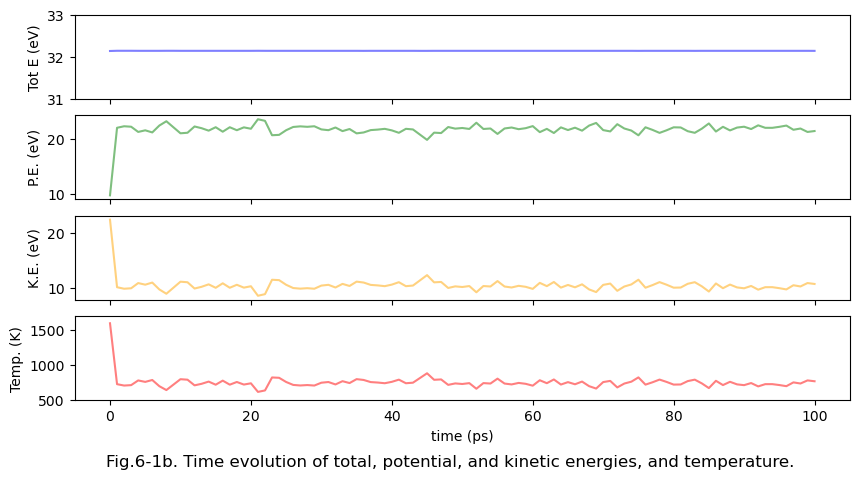

In [41]:
# fer els gràfics
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 5))

#color = 'tab:grey'
ax1 = fig.add_subplot(4, 1, 1)
ax1.set_xticklabels([])
ax1.set_ylabel('Tot E (eV)')
ax1.set_ylim([31.,33.])
ax1.plot(df["Time[ps]"], df["Etot[eV]"], color="blue",alpha=0.5)

ax2 = fig.add_subplot(4, 1, 2)
ax2.set_xticklabels([])
ax2.set_ylabel('P.E. (eV)')
ax2.plot(df["Time[ps]"], df["Epot[eV]"], color="green",alpha=0.5)

ax3 = fig.add_subplot(4, 1, 3)
ax3.set_xticklabels([])
ax3.set_ylabel('K.E. (eV)')
ax3.plot(df["Time[ps]"], df["Ekin[eV]"], color="orange",alpha=0.5)

ax4 = fig.add_subplot(4, 1, 4)
ax4.set_xlabel('time (ps)')
ax4.set_ylabel('Temp. (K)')
ax4.plot(df["Time[ps]"], df["T[K]"], color="red",alpha=0.5)
ax4.set_ylim([500., 1700])

fig.suptitle("Fig.6-1b. Time evolution of total, potential, and kinetic energies, and temperature.", y=0)

#plt.savefig("6-1_liquid-Al_NVE_1.0fs_test_E_vs_t.png")  # <- Use if saving to an image file is desired
plt.show()

In [42]:
# Additional MD NVT simulations are present in the tutorial guide. 
# https://docs.matlantis.com/atomistic-simulation-tutorial/en/6_2_md-nvt.html
# optional, show the implementation of thermostat

In [43]:
# Additional MD NPT simulations are present in the tutorial guide. 
# https://docs.matlantis.com/atomistic-simulation-tutorial/en/6_3_md-npt.html
# optional, show the implementation of thermostat

A different example is provided below. 

In [46]:
"""Demonstrates molecular dynamics with constant energy."""

from ase import units
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet

# Use Asap for a huge performance increase if it is installed
use_asap = True

if use_asap:
    from asap3 import EMT
    size = 10
else:
    from ase.calculators.emt import EMT
    size = 3

# Set up a crystal
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          symbol="Cu",
                          size=(size, size, size),
                          pbc=True)

# Describe the interatomic interactions with the Effective Medium Theory
atoms.calc = EMT()

# Set the momenta corresponding to T=300K
MaxwellBoltzmannDistribution(atoms, temperature_K=300)

# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = VelocityVerlet(atoms, 5 * units.fs)  # 5 fs time step.


def printenergy(a=atoms):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


# Now run the dynamics
dyn.attach(printenergy, interval=10)
printenergy()
dyn.run(200)

Energy per atom: Epot = -0.001eV  Ekin = 0.039eV (T=301K)  Etot = 0.038eV
Energy per atom: Epot = -0.001eV  Ekin = 0.039eV (T=301K)  Etot = 0.038eV
Energy per atom: Epot = 0.029eV  Ekin = 0.009eV (T= 70K)  Etot = 0.038eV
Energy per atom: Epot = 0.020eV  Ekin = 0.019eV (T=146K)  Etot = 0.038eV
Energy per atom: Epot = 0.018eV  Ekin = 0.021eV (T=160K)  Etot = 0.038eV
Energy per atom: Epot = 0.017eV  Ekin = 0.021eV (T=164K)  Etot = 0.038eV
Energy per atom: Epot = 0.021eV  Ekin = 0.018eV (T=138K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.019eV (T=149K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.020eV (T=153K)  Etot = 0.038eV
Energy per atom: Epot = 0.018eV  Ekin = 0.020eV (T=158K)  Etot = 0.038eV
Energy per atom: Epot = 0.020eV  Ekin = 0.018eV (T=143K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.019eV (T=151K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.020eV (T=154K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.020eV (

True

If we want to control the temperature of an MD simulation (NVT), a thermostat (Langevin thermostat) can be implemented using `dyn = Langevin(...)` instead of `dyn = VelocityVerlet(...)`. 

In [47]:
"""Demonstrates molecular dynamics with constant temperature."""
from asap3 import EMT  # Way too slow with ase.EMT !

from ase import units
from ase.io.trajectory import Trajectory
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.langevin import Langevin

size = 10

T = 1500  # Kelvin

# Set up a crystal
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          symbol="Cu",
                          size=(size, size, size),
                          pbc=False)

# Describe the interatomic interactions with the Effective Medium Theory
atoms.calc = EMT()

# We want to run MD with constant energy using the Langevin algorithm
# with a time step of 5 fs, the temperature T and the friction
# coefficient to 0.02 atomic units.
dyn = Langevin(atoms, 5 * units.fs, T * units.kB, 0.002)


def printenergy(a=atoms):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


dyn.attach(printenergy, interval=50)

# We also want to save the positions of all atoms after every 100th time step.
traj = Trajectory('moldyn3.traj', 'w', atoms)
dyn.attach(traj.write, interval=50)

# Now run the dynamics
printenergy()
dyn.run(5000)

/Users/sergiortizropero/miniconda3/envs/ANI_venv/lib/python3.10/site-packages/ase/md/md.py:52: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


Energy per atom: Epot = 0.135eV  Ekin = 0.000eV (T=  0K)  Etot = 0.135eV
Energy per atom: Epot = 0.135eV  Ekin = 0.000eV (T=  0K)  Etot = 0.135eV
Energy per atom: Epot = 0.143eV  Ekin = 0.011eV (T= 87K)  Etot = 0.154eV
Energy per atom: Epot = 0.152eV  Ekin = 0.019eV (T=148K)  Etot = 0.171eV
Energy per atom: Epot = 0.160eV  Ekin = 0.028eV (T=217K)  Etot = 0.188eV
Energy per atom: Epot = 0.168eV  Ekin = 0.036eV (T=275K)  Etot = 0.204eV
Energy per atom: Epot = 0.178eV  Ekin = 0.042eV (T=324K)  Etot = 0.220eV
Energy per atom: Epot = 0.185eV  Ekin = 0.049eV (T=376K)  Etot = 0.234eV
Energy per atom: Epot = 0.192eV  Ekin = 0.057eV (T=440K)  Etot = 0.248eV
Energy per atom: Epot = 0.199eV  Ekin = 0.064eV (T=496K)  Etot = 0.263eV
Energy per atom: Epot = 0.205eV  Ekin = 0.071eV (T=547K)  Etot = 0.276eV
Energy per atom: Epot = 0.213eV  Ekin = 0.075eV (T=582K)  Etot = 0.288eV
Energy per atom: Epot = 0.223eV  Ekin = 0.077eV (T=598K)  Etot = 0.300eV
Energy per atom: Epot = 0.229eV  Ekin = 0.083eV (T=

True

And use `ase gui moldyn3.traj` to check the output. 

In [49]:
traj = Trajectory('moldyn3.traj')
view(traj, viewer='ngl')

Another NVT example of equilibrating a box of TIP3P waters (rigid molecules). The TIP3P force field is contained in `ase.calculators.tip3p`. Remember that when changing the system, if a different interatomic potential wants to be used, a different calculator is necessary!

In [60]:
import numpy as np

import ase.units as units
from ase import Atoms
from ase.calculators.tip3p import TIP3P, angleHOH, rOH
from ase.constraints import FixBondLengths
from ase.io.trajectory import Trajectory
from ase.md import Langevin

# Set up water box at 20 deg C density
x = angleHOH * np.pi / 180 / 2
pos = [[0, 0, 0],
       [0, rOH * np.cos(x), rOH * np.sin(x)],
       [0, rOH * np.cos(x), -rOH * np.sin(x)]]
atoms = Atoms('OH2', positions=pos)

vol = ((18.01528 / 6.022140857e23) / (0.9982 / 1e24))**(1 / 3.)
atoms.set_cell((vol, vol, vol))
atoms.center()

atoms = atoms.repeat((3, 3, 3))
atoms.set_pbc(True)

# RATTLE-type constraints on O-H1, O-H2, H1-H2.
atoms.constraints = FixBondLengths([(3 * i + j, 3 * i + (j + 1) % 3)
                                    for i in range(3**3)
                                    for j in [0, 1, 2]])

tag = 'tip3p_27mol_equil'
atoms.calc = TIP3P(rc=4.5)
md = Langevin(atoms, 1 * units.fs, temperature=300 * units.kB,
              friction=0.01, logfile=tag + '.log')

traj = Trajectory(tag + '.traj', 'w', atoms)
md.attach(traj.write, interval=1)
md.run(400)

# Repeat box and equilibrate further.
tag = 'tip3p_216mol_equil'
atoms.set_constraint()  # repeat not compatible with FixBondLengths currently.
atoms = atoms.repeat((2, 2, 2))
atoms.constraints = FixBondLengths([(3 * i + j, 3 * i + (j + 1) % 3)
                                    for i in range(int(len(atoms) / 3))
                                    for j in [0, 1, 2]])
atoms.calc = TIP3P(rc=7.)
md = Langevin(atoms, 2 * units.fs, temperature=300 * units.kB,
              friction=0.01, logfile=tag + '.log')

traj = Trajectory(tag + '.traj', 'w', atoms)
md.attach(traj.write, interval=1)
md.run(200)

648


True

In [61]:
traj = Trajectory('tip3p_216mol_equil.traj')
view(traj, viewer='ngl')

If, instead of TIP3P waters, acetonytrile is to be used as solvent (NVT), `ase.calculators.acn` provides a suitable forcefield (ACN is considered to be neutral)

In [58]:
import numpy as np

import ase.units as units
from ase import Atoms
from ase.calculators.acn import ACN, m_me, r_cn, r_mec
from ase.constraints import FixLinearTriatomic
from ase.io import Trajectory
from ase.md import Langevin

pos = [[0, 0, -r_mec],
       [0, 0, 0],
       [0, 0, r_cn]]
atoms = Atoms('CCN', positions=pos)
atoms.rotate(30, 'x')

# First C of each molecule needs to have the mass of a methyl group
masses = atoms.get_masses()
masses[::3] = m_me
atoms.set_masses(masses)

# Determine side length of a box with the density of acetonitrile at 298 K
# Density in g/Ang3 (https://pubs.acs.org/doi/10.1021/je00001a006)
d = 0.776 / 1e24
L = ((masses.sum() / units.mol) / d)**(1 / 3.)
# Set up box of 27 acetonitrile molecules
atoms.set_cell((L, L, L))
atoms.center()
atoms = atoms.repeat((3, 3, 3))
atoms.set_pbc(True)

# Set constraints for rigid triatomic molecules
nm = 27
atoms.constraints = FixLinearTriatomic(
    triples=[(3 * i, 3 * i + 1, 3 * i + 2)
             for i in range(nm)])

tag = 'acn_27mol_300K'
atoms.calc = ACN(rc=np.min(np.diag(atoms.cell)) / 2)

# Create Langevin object
md = Langevin(atoms, 1 * units.fs,
              temperature=300 * units.kB,
              friction=0.01,
              logfile=tag + '.log')

traj = Trajectory(tag + '.traj', 'w', atoms)
md.attach(traj.write, interval=1)
md.run(5000)

# Repeat box and equilibrate further
atoms.set_constraint()
atoms = atoms.repeat((2, 2, 2))
nm = 216
atoms.constraints = FixLinearTriatomic(
    triples=[(3 * i, 3 * i + 1, 3 * i + 2)
             for i in range(nm)])

tag = 'acn_216mol_300K'
atoms.calc = ACN(rc=np.min(np.diag(atoms.cell)) / 2)

# Create Langevin object
md = Langevin(atoms, 2 * units.fs,
              temperature=300 * units.kB,
              friction=0.01,
              logfile=tag + '.log')

traj = Trajectory(tag + '.traj', 'w', atoms)
md.attach(traj.write, interval=1)
md.run(3000)

True

In [59]:
traj = Trajectory('acn_216mol_300K.traj')
view(traj, viewer='ngl')